# International Football Results Analysis

This Jupyter notebook provides an analysis of international football results including match outcomes, top tournaments, top scoring players, and an investigation into whether away teams have increased chances of winning in certain months.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load datasets
results_df = pd.read_csv('data/results.csv')
goalscorers_df = pd.read_csv('data/goalscorers.csv')
shootouts_df = pd.read_csv('data/shootouts.csv')

## Match Outcomes: Home vs Away

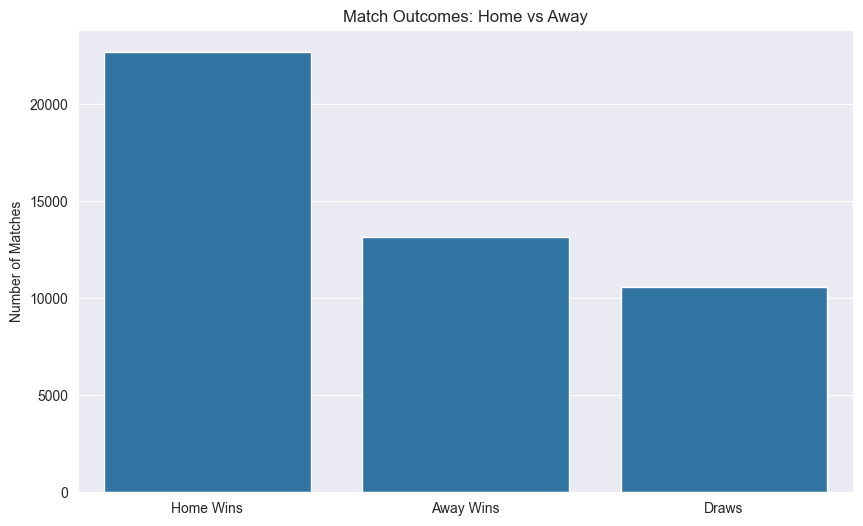

In [5]:
home_wins = results_df[results_df['home_score'] > results_df['away_score']].shape[0]
away_wins = results_df[results_df['home_score'] < results_df['away_score']].shape[0]
draws = results_df[results_df['home_score'] == results_df['away_score']].shape[0]

plt.figure(figsize=(10, 6))
sns.barplot(x=['Home Wins', 'Away Wins', 'Draws'], y=[home_wins, away_wins, draws])
plt.title('Match Outcomes: Home vs Away')
plt.ylabel('Number of Matches')
plt.show()

## Top 10 Tournaments by Number of Matches

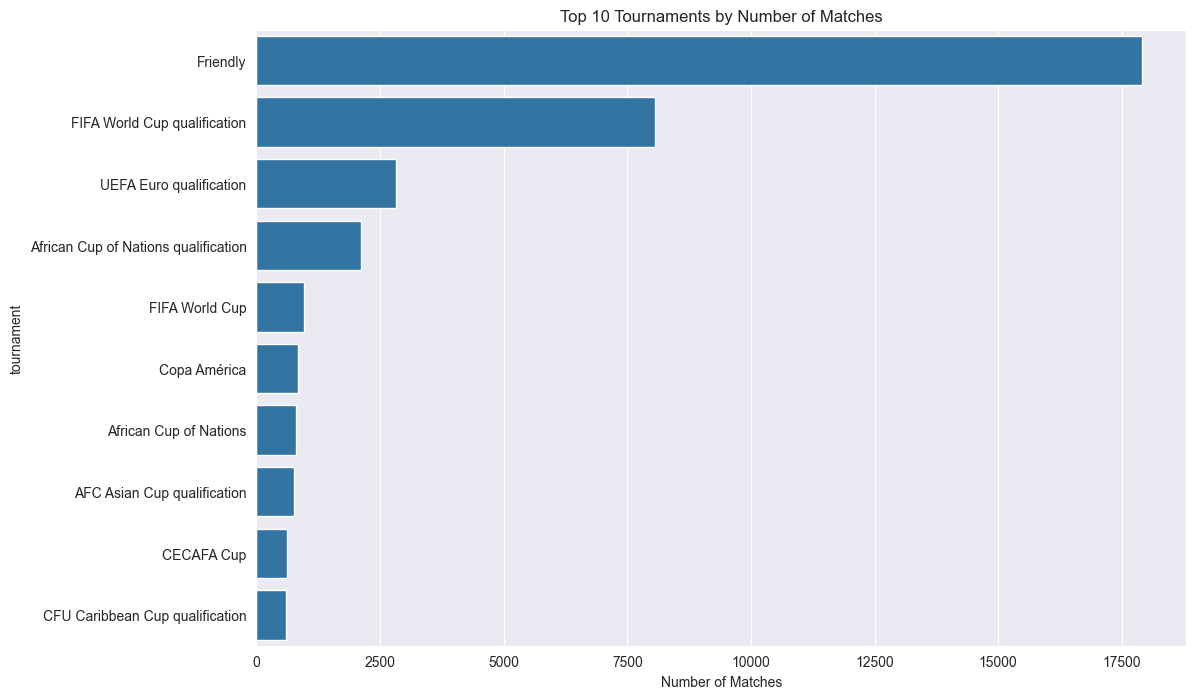

In [6]:
top_tournaments = results_df['tournament'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_tournaments.values, y=top_tournaments.index)
plt.title('Top 10 Tournaments by Number of Matches')
plt.xlabel('Number of Matches')
plt.show()

## Top 10 Scoring Players

In [7]:
top_scorers = goalscorers_df.groupby('player')['goals'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_scorers.values, y=top_scorers.index)
plt.title('Top 10 Scoring Players')
plt.xlabel('Goals')
plt.show()

KeyError: 'player'

## Away Team Winning Chances by Month

In [ ]:
results_df['date'] = pd.to_datetime(results_df['date'])
results_df['month'] = results_df['date'].dt.month
away_wins_by_month = results_df[results_df['home_score'] < results_df['away_score']].groupby('month').size()
matches_by_month = results_df.groupby('month').size()
win_ratio_by_month = away_wins_by_month / matches_by_month

plt.figure(figsize=(10, 6))
sns.lineplot(x=win_ratio_by_month.index, y=win_ratio_by_month.values)
plt.title('Away Team Winning Chances by Month')
plt.xlabel('Month')
plt.ylabel('Win Ratio')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Statistical significance
observed = away_wins_by_month.values
expected = matches_by_month.values / 3  # Assuming equal chances for home win, away win, and draw
chi2, p = stats.chisquare(observed, f_exp=expected)
p